# 1. Summary

#### Aim:
To understand the relationship between median value of properties in Boston, USA, and other attributes/features of a house. It is of our interest to build a model to predict median house price in Boston.

#### Data:
- A data set with 506 samples and 13 features were used for this analysis. The target variable of interest is MEDV.
- There were no missing data.

#### Method:
- Multi-linear regression models were fitted to explain and predict house price.

- Two models were hypothesised:
    - Hypothesis 1: $Y_{MEDV_i} = \beta_0 + \beta_1 * CRIM + \beta_2 * INDUS + \beta_3 * PTRATIO + \beta_4 * RAD + \epsilon_i$
    - Hypothesis 2: $Y_{MEDV_i} = \beta_0 + \beta_1 * ZN + \beta_2 * RM + \beta_3 * CHAS + \beta_4 * DIS + \epsilon_i$, where CHAS = 0 or 1

#### Results and findings:

- The data set have multi-collinearity among features. Based on this we hypothesised two models and fitted it to the train-test data of 80:20 split.

- The prediction errors of hypotheses are:
    - Hypothesis 1: The MAE and RMSE metrics suggest that the prediction error is about $4.8K and $7K respectively.
    - Hypothesis 2: The MAE and RMSE metrics suggest that the prediction error is about $4.66K and $7.57K respectively.

- We believe that the prediction performance could be improved. Therefore it is recommended to try selecting best features systematically and interpret the best prediction model(s).

# 2. Technical notes

### Initial hypothesis

House price is influenced by a range of factors such as location, property features, economic conditions - supply and demand, environmental factors, population demographics and current price of the property.

### a. Exploratory data analysis

In [1]:
!python --version

# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import scipy
import statsmodels.api as sm

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

Python 3.11.2


##### Read in the data 

In [2]:
data = pd.read_csv('\DATA\BostonHousing.csv', index_col=False)

##### Inspect the data

In [3]:
# view top 5 rows
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [4]:
# view bottom 5 rows
data.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9,0


In [5]:
# shape
data.shape

(506, 14)

In [6]:
# information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


Data source and definition:
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [7]:
# missing values
data.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [8]:
# missing values
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

Comments:

- The data set has 506 samples and 13 features.

- Data definitions:
    - CRIM - per capita crime rate by town, continuous numeric variable.
    - ZN - proportion of residential land zoned for lots over 25,000 sq.ft, continuous numeric variable.
    - INDUS - proportion of non-retail business acres per town, continuous numeric variable.
    - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise), categorical variable (Yes = 1, No = 0).
    - NOX - nitric oxides concentration (parts per 10 million), continuous numeric variable.
    - RM - average number of rooms per dwelling, continuous numeric variable.
    - AGE - proportion of owner-occupied units built prior to 1940, continuous numeric variable.
    - DIS - weighted distances to five Boston employment centres, continuous numeric variable.
    - RAD - index of accessibility to radial highways, discrete numeric / categorical variable (1 to 24).
    - TAX - full-value property-tax rate per $10,000, continuous numeric variable.
    - PTRATIO - pupil-teacher ratio by town, continuous numeric variable.
    - LSTAT - % lower status of the population, continuous numeric variable.
    - MEDV - Median value of owner-occupied homes in $1000's, continuous numeric variable.

- Target feature:
    - MEDV is our target feature.

- Data quality:
    - There are no missing data.


- Let's remove the last column from the data set as we don't have the definition for it. Additionally, CHAS should be changed to categorical variable.

In [9]:
data.drop(columns=data.columns[13], axis=1, inplace=True)

##### Descriptive statistics

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Comments:

- CRIM:     The min is 0.006, mean is 3.6, median is 0.25 and max is ~89. 
- ZN:       The min is 0% and mean is 11% and max is 100%. 
- INDUS:    The min is 0.46%, mean is 11%, and max is 28%. 
- CHAS:     Charles river - categorical variable. Change this to categorical. 
- NOX:      The min is 0.38 ppm, mean is 0.55 ppm and max is 0.87 ppm. 
- RM:       The min is 3.56 rooms, mean is 6.28 rooms and max is 8.78 rooms. 
- AGE:      The min age is 2.9%, mean is 68.57% and max is 100%. 
- DIS:      The min distance is 1.12, mean is 3.79 and max is 12.12. 
- RAD:      The min index is 1, mean index is 9.54, median is 5 and max is 24. 
- TAX:      The min property tax rate is 187, mean is 408.23, and max is 711. 
- PTRATIO:  The min pupil-teacher ratio is 12.60, mean is 18.45, and max is 22. 
- LSTAT:    The min lower status pop. % is 1.73%, mean is 12.65, and max is 37.97. 
- MEDV:     The min is $5K, mean is $22.53K, median is $21.2K and max is $50K. 

Initial hypotheses:

Hypothesis 1:
- CRIM, INDUS, NOX, AGE, DIS, PTRATIO, LSTAT: When these variables are low, the median value would be high (in other words, when these features are high, the median value would be low).
    - CRIM - lower the crime rate higher the median value,
    - INDUS - lower the industrial land (%) higher the median value,
    - NOX - lower the NOX higher the median value,
    - AGE - lower the proportion higher the median value,
    - DIS - lower the distance higher the median value,
    - PTRATIO - lower the ratio higher the median value,
    - LSTAT - lower the low status pop. % higher the median value,
    - RAD - lower the accessibility to highway higher the median value.

Hypothesis 2:
- ZN, RM, TAX, CHAS: When these features are high, the median value would be high.
    - ZN - higher the proportion of residential land zoned, higher the median value,
    - RM - more rooms higher the median value,
    - TAX - higher the property tax rate, higher the median value.
    - CHAS: higher median value for areas that's close by Charles river.

Change the CHAS feature to categorical

In [11]:
data['CHAS'] = data.CHAS.astype(str)
data['CHAS'][0:5]

0    0
1    0
2    0
3    0
4    0
Name: CHAS, dtype: object

##### Visual exploratory analysis

Univariate analysis

Text(0.5, 0, 'Price in $ (000)')

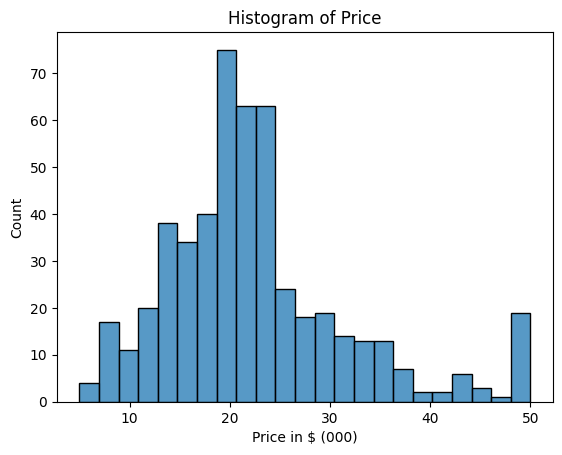

In [12]:
sb.histplot(data['MEDV'])
plt.title('Histogram of Price')
plt.xlabel('Price in $ (000)')

Text(0.5, 0, 'Price in $ (000)')

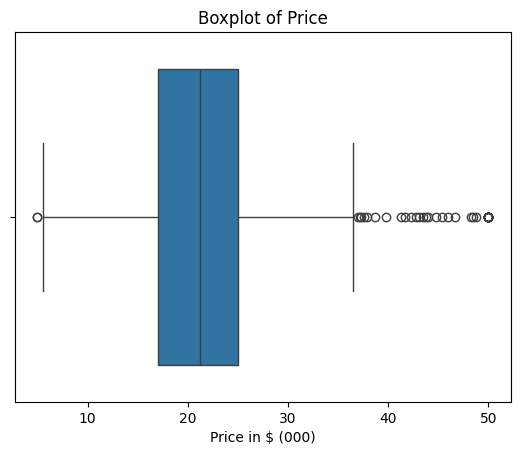

In [13]:
sb.boxplot(data['MEDV'], orient='h')
plt.title('Boxplot of Price')
plt.xlabel('Price in $ (000)')

In [14]:
# Calculate the skewness 
print(scipy.stats.skew(data['MEDV'], axis=0, bias=True))

1.104810822864635


Comments:
- Shape and distribution: The distribution appears to be somewhat Normal. 
- Outliers and skewness: There appears to be some influential points, and there is a slight right-skewness. 

Text(0.5, 1.0, 'Distribution of samples by Charles river')

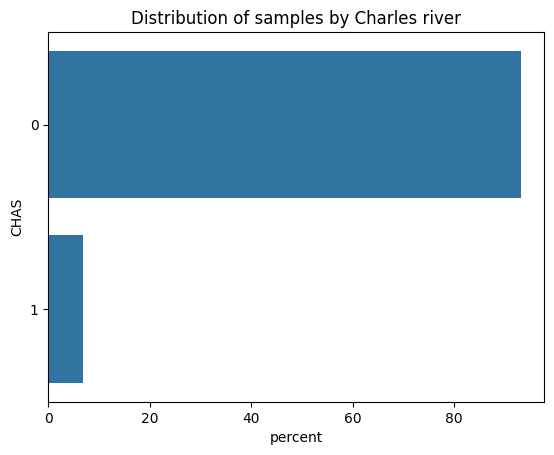

In [15]:
plt = sb.countplot(y = 'CHAS',
            data = data, 
            orient = 'h',
            stat = 'percent')
            #order = data['Year'].value_counts().index)
plt.set_title('Distribution of samples by Charles river')

Comments:
- There is data imbalance in the sample.
- Almost 90% of the samples are not nearby Charles river, which makes sense. Assume it's the same distribution in population.

##### Pairs plot

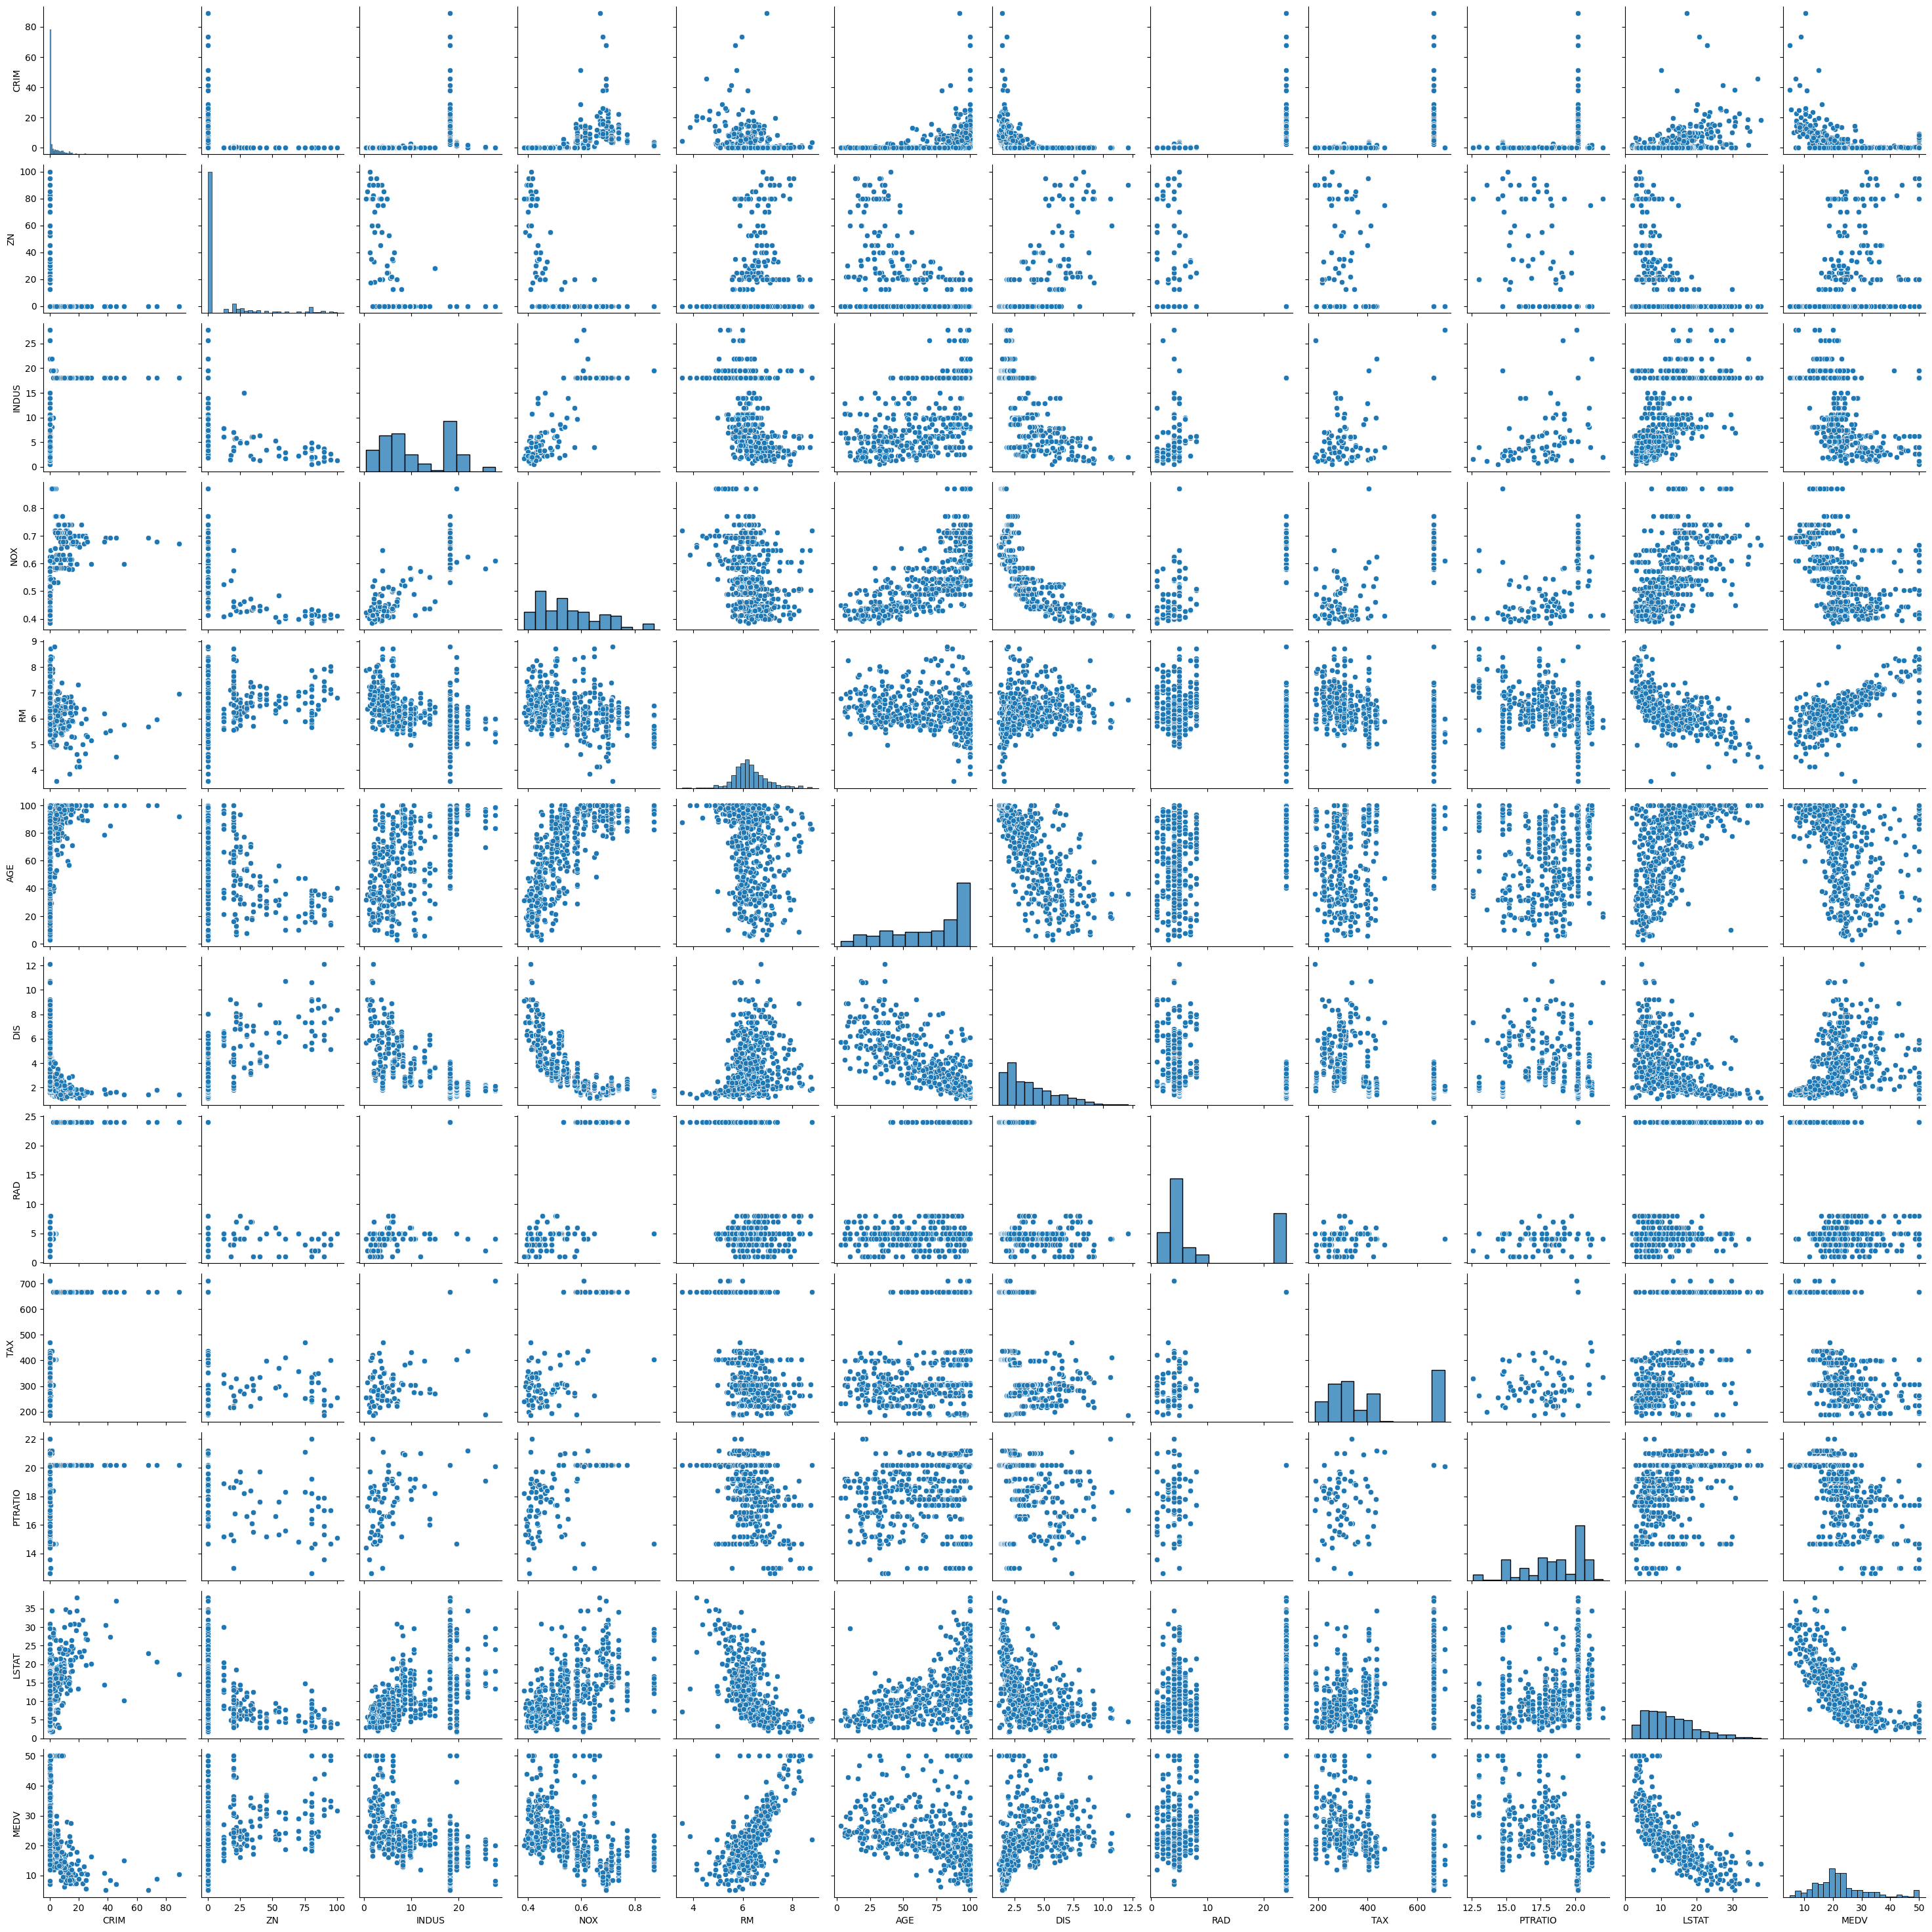

In [16]:
sb.pairplot(data)

Comments:

Hypothesis 1:
- CRIM, INDUS, NOX, AGE, DIS, PTRATIO, LSTAT, RAD: When these variables are low, the median value would be high (in other words, when these features are higher, the median value would be low).

- all except AGE, DIS  looks okay.
    - CRIM - lower the crime rate higher the median value (holds good),
    - INDUS - lower the industrial land (%) higher the median value (appears to be true),
    - NOX - lower the NOX higher the median value (appears to be true),
    - AGE - lower the proportion higher the median value (not quite right),
    - DIS - lower the distance higher the median value (appears to be okay / also there are fewer samples when distance increases / let's check using Corr. heatmap),
    - PTRATIO - lower the ratio higher the median value (holds good),
    - LSTAT - lower the low status pop. % higher the median value (holds good),
    - RAD - lower the accessibility to highway higher the median value (holds good).

Hypothesis 2:
- ZN, RM, TAX, CHAS: When these features are high, the median value would be high.
- all except TAX looks okay. We should check presence of Charles river using Correlation heatmap.

    - ZN - higher the proportion of residential land zoned, higher the median value (holds good),
    - RM - more rooms higher the median value (holds good),
    - TAX - higher the property tax rate, higher the median value (not quite right).
    - CHAS: higher median value for areas that's close by Charles river (let's check using the Correlation heatmap).

##### Correlation

In [17]:
data.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


Text(0.5, 1.0, 'Correlation heatmap')

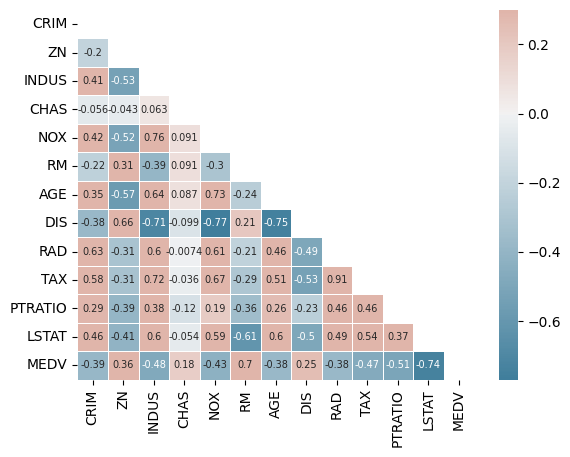

In [18]:
corr_mat = data.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(corr_mat,
           annot=True,
           linewidth=.5,
           center=0,
           mask=mask,
           cmap=cmap, 
           vmax=.3,
           annot_kws={"size":7})
#plt.yticks(rotation=45)
plt.set_title('Correlation heatmap')

Comments: 

Hypothesis 1:
- CRIM, INDUS, NOX, AGE, DIS, PTRATIO, LSTAT, RAD: When these variables are low, the median value would be high (in other words, when these features are higher, the median value would be low).

- So our hypothesis 1 looks okay for all except - DIS. As distance increases median value also increase. It is sensible, our sample data suggests that there are fewer houses when DIS increase (so if the median value is higher for fewer houses in the population, then this holds good).


Hypothesis 2:
- ZN, RM, TAX, CHAS: When these features are high, the median value would be high.

- So our hypothesis 2 looks okay for all except - TAX. As TAX increases median value decrease.


Let's review and update our hypotheses based on our findings:

Hypothesis 1: 
- CRIM, INDUS, NOX, AGE, PTRATIO, LSTAT, RAD, TAX: When these variables are low, the median value would be high (in other words, when these features are higher, the median value would be low).


Hypothesis 2: 
- ZN, RM, CHAS, DIS: When these features are high, the median value would be high.

Multi-collinearity checks:


Industrial neigbourhoods have poor air quality, higher tax rates and ageing houses:
- INDUS is positively correlated with NOX (+0.76), TAX (+0.72), AGE (+0.64) and LSTAT (+0.6), and negatively with DIS (-0.71).

Air quality gets worse in city and neighbourhoods closer to highways, and it gets better in the outskirts of Boston:
- NOX is positively correlated with AGE (+0.73), TAX (+0.67), RAD (+0.61), LSTAT (+0.59), and negatively with DIS (-0.77).

Crime rate is higher in the neighbourhoods that are closer to the highways:
- CRIM is positively correlated with RAD (+0.63) and TAX (+0.58).

More residential land are zoned in outskirts and old houses are in prime areas of Boston:
- ZN is negatively correlated with AGE (-0.57) and positively correlated with DIS (+0.66).
- AGE is negatively correlated with DIS (-0.75).

Inequality - poor people live in smaller homes compared to wealthy households:
- RM is negatively correlated with LSTAT (-0.61).

Property tax rates are high in outskirts/for homes closer to highways:
- RAD and TAX are positively correlated (+0.91).


### b. Model building

Review and hypothesise: 

- We have sample size of 506 obs., and 12 input features and 1 target feature (MEDV).

- There are multi-collinearity among the features.

- Our initial analysis suggests the following hypotheses are sensible:

    - Hypothesis 1: $Y_{MEDV_i} = \beta_0 + \beta_1 * CRIM + \beta_2 * INDUS + \beta_3 * PTRATIO + \beta_4 * RAD + \epsilon_i$
    - Hypothesis 2: $Y_{MEDV_i} = \beta_0 + \beta_1 * ZN + \beta_2 * RM + \beta_3 * CHAS + \beta_4 * DIS + \epsilon_i$, where CHAS = 0 or 1

Linear regression assumptions:

- IID: Sample data are independent of each other, and come from identical/Normal distribution,
- The expected value ($\mu$) is a linear combination of features,
- The errors/residuals have constant variance.

##### Fit the model for hypothesis 1:

In [19]:
# set X and Y
Y = data['MEDV']
X = data[['CRIM', 'INDUS', 'PTRATIO', 'RAD']]


# splitting data to training and testing dataset. 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 12122024)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 4)
xtest shape  :  (102, 4)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [20]:
xtrain.head()

,CRIM,INDUS,PTRATIO,RAD
38,0.17505,5.96,19.2,5
337,0.03041,5.19,20.2,5
6,0.08829,7.87,15.2,5
372,8.26725,18.10,20.2,24
462,6.65492,18.10,20.2,24


In [21]:
xtest.head()

,CRIM,INDUS,PTRATIO,RAD
256,0.01538,3.75,15.9,3
192,0.08664,3.44,15.2,5
99,0.06860,2.89,18.0,2
415,18.08460,18.10,20.2,24
341,0.01301,1.52,15.5,1


In [22]:
# fit multi-linear regression model to training model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

# predicting the test set results
y_pred = regressor.predict(xtest)

In [23]:
# performance metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
rmse = root_mean_squared_error(ytest, y_pred)
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("Root mean sq. error: ", rmse)

Mean squared error:  49.069899520847954
Mean absolute error:  4.862589964925692
Root mean sq. error:  7.004991043595128


[Text(0.5, 0, 'Actual MEDV in $000'),
 Text(0, 0.5, 'Pred. MEDV in $000'),
 Text(0.5, 1.0, 'Hyp. 1: Obs. vs. Pred MEDV')]

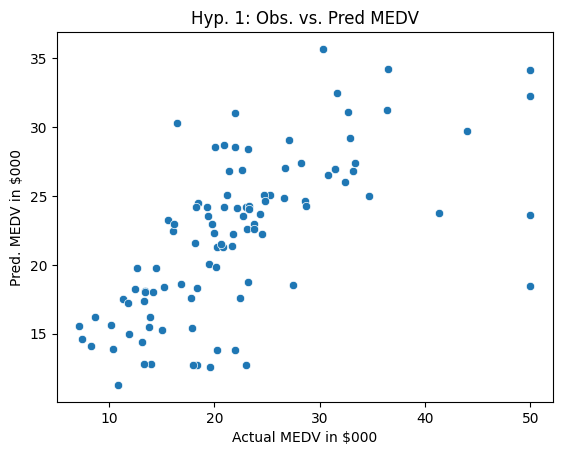

In [24]:
# regression plot of observed MEDV and predicted MEDV
plt = sb.scatterplot(x = ytest, 
                     y = y_pred)
plt.set(xlabel ="Actual MEDV in $000", ylabel = "Pred. MEDV in $000", title = 'Hyp. 1: Obs. vs. Pred MEDV')

Comments: 
- Hypothesis 1: The MAE and RMSE metrics suggest that the prediction error is about $4.8K and $7K respectively.

##### Fit the model for hypothesis 2:

In [25]:
# one hot encode the CHAS feature

data_encoded = pd.get_dummies(data, columns=['CHAS'], drop_first=True)
data_encoded.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,False
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,False
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,False
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,False
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,False


In [26]:
# set X and Y
X = data_encoded[['ZN', 'RM', 'CHAS_1', 'RAD']]


# splitting data to training and testing dataset. 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 12122024)

print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 4)
xtest shape  :  (102, 4)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [27]:
xtrain.head()

,ZN,RM,CHAS_1,RAD
38,0.0,5.966,False,5
337,0.0,5.895,False,5
6,12.5,6.012,False,5
372,0.0,5.875,True,24
462,0.0,6.317,False,24


In [28]:
xtest.head()

,ZN,RM,CHAS_1,RAD
256,90.0,7.454,False,3
192,45.0,7.178,False,5
99,0.0,7.416,False,2
415,0.0,6.434,False,24
341,35.0,7.241,False,1


In [29]:
# fit multi-linear regression model to training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

# predicting the test set results
y_pred = regressor.predict(xtest)

In [30]:
# performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
mse = mean_squared_error(ytest, y_pred)
mae = mean_absolute_error(ytest,y_pred)
rmse = root_mean_squared_error(ytest, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("Root mean sq. error: ", rmse)

Mean squared error:  57.29814368174675
Mean absolute error:  4.662063949827023
Root mean sq. error:  7.569553730686291


[Text(0.5, 0, 'Actual MEDV in $000'),
 Text(0, 0.5, 'Pred. MEDV in $000'),
 Text(0.5, 1.0, 'Hyp. 2: Obs. vs. Pred MEDV')]

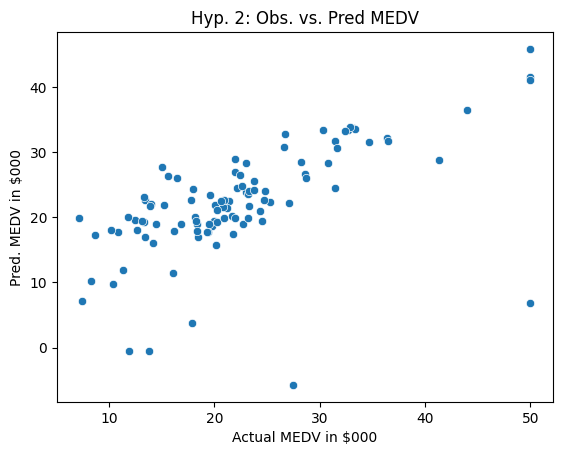

In [31]:
# regression plot of observed MEDV and predicted MEDV
plt = sb.scatterplot(x = ytest, 
                     y = y_pred)
plt.set(xlabel ="Actual MEDV in $000", ylabel = "Pred. MEDV in $000", title = 'Hyp. 2: Obs. vs. Pred MEDV')

Comments: 
- Hypothesis 2: The MAE and RMSE metrics suggest that the prediction error is about $4.66K and $7.57K respectively.